In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Products Analysis

## EDA Process

We have received the "orders" .csv. In order to answer the questions accurately, we need to clean the data first. We have developed the following function:

In [100]:
import pandas as pd

def load_and_clean_data(file_path):
    df = pd.read_csv(file_path)

    column_mapping = {
        "33557880": "order_id",
        "2019-03-10 23:59:59.000000": "activation_time_local",
        "AR": "country_code",
        "14200": "store_address",
        "DeliveredStatus": "final_status",
        "PAID": "payment_status",
        "1": "products",
        "4.54": "products_total",
        "8.64": "purchase_total_price"
    }
    df.rename(columns=column_mapping, inplace=True)

    df = df.drop_duplicates()

    return df

file_path = "data/orders.csv"
df = load_and_clean_data(file_path)

df


,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price
0,33512615,2019-03-10 23:58:32.000000,TR,28725,DeliveredStatus,PAID,1,3.76,3.76
1,33512451,2019-03-10 23:57:56.000000,TR,28725,DeliveredStatus,PAID,1,2.86,2.86
2,33530892,2019-03-10 23:57:33.000000,ES,19777,CanceledStatus,PAID,1,12.95,0.00
3,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48
4,33512273,2019-03-10 23:57:13.000000,TR,63536,DeliveredStatus,PAID,4,1.88,1.96
...,...,...,...,...,...,...,...,...,...
60394,31960607,2019-03-01 00:04:31.000000,TR,68820,DeliveredStatus,PAID,2,10.17,10.33
60395,32002079,2019-03-01 00:03:53.000000,AR,50175,CanceledStatus,PAID,1,3.80,0.00
60396,32002046,2019-03-01 00:03:06.000000,AR,55159,DeliveredStatus,PAID,1,4.24,4.91
60397,32001950,2019-03-01 00:01:01.000000,AR,62504,CanceledStatus,PAID,1,4.91,0.00


## 1. What percent of orders are under-authorized? 

When the products_total is lower than purchase_total_price we call them under-authorized orders, otherwise is a
correctly authorized order. We iterate each row so we can know which ones are under-authorized:

In [101]:
df_under_authorized = []

for index, row in df.iterrows():
    if row['products_total'] < row['purchase_total_price']:
        df_under_authorized.append(row)
        
df_under_authorized = pd.DataFrame(df_under_authorized)
df_under_authorized

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price
3,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48
4,33512273,2019-03-10 23:57:13.000000,TR,63536,DeliveredStatus,PAID,4,1.88,1.96
6,33511759,2019-03-10 23:55:21.000000,TR,47493,DeliveredStatus,PAID,2,2.37,2.45
9,33523444,2019-03-10 23:53:38.000000,RO,72549,DeliveredStatus,PAID,2,2.05,10.17
11,33530379,2019-03-10 23:52:20.000000,FR,4444,DeliveredStatus,PAID,1,8.10,10.20
...,...,...,...,...,...,...,...,...,...
60379,31965637,2019-03-01 00:30:50.000000,TR,44528,DeliveredStatus,PAID,1,3.44,6.89
60388,32002620,2019-03-01 00:14:57.000000,AR,62623,DeliveredStatus,PAID,2,1.79,5.36
60394,31960607,2019-03-01 00:04:31.000000,TR,68820,DeliveredStatus,PAID,2,10.17,10.33
60396,32002046,2019-03-01 00:03:06.000000,AR,55159,DeliveredStatus,PAID,1,4.24,4.91


Now, we calculate the percentage:

In [120]:
percentage = df_under_authorized.shape[0] / df.shape[0]
percentage

0.5758373483004685

#### Graphic representation

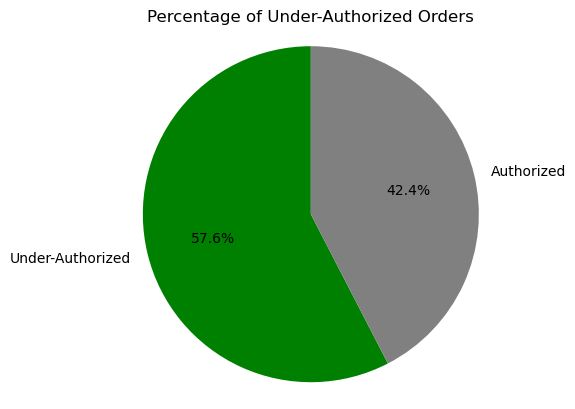

In [130]:
df_under_authorized = df[df['products_total'] < df['purchase_total_price']]

percentage = df_under_authorized.shape[0] / df.shape[0]

labels = ['Under-Authorized', 'Authorized']
sizes = [percentage, 1 - percentage]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'grey'])
ax.axis('equal') 

plt.title('Percentage of Under-Authorized Orders')
plt.show()


## 2. What percent of orders would be correctly authorized w/ incremental authorisation (+20%) on the amount at checkout? 

To do so, we have created a new column where the new price is multiplied by 1.2 and then we have analyzed the new percentage.

In [104]:
df["products_total_checkout"] = df["products_total"]*1.2
df_under_authorized_checkout = []

for index, row in df.iterrows():
    if row['products_total_checkout'] < row['purchase_total_price']:
        df_under_authorized_checkout.append(row)
        
df_under_authorized_checkout = pd.DataFrame(df_under_authorized_checkout)

In [105]:
percentage_good_with_checkout = df_under_authorized_checkout.shape[0] / df.shape[0]
percentage_good_with_checkout

0.3096408880941737

#### Graphic representation

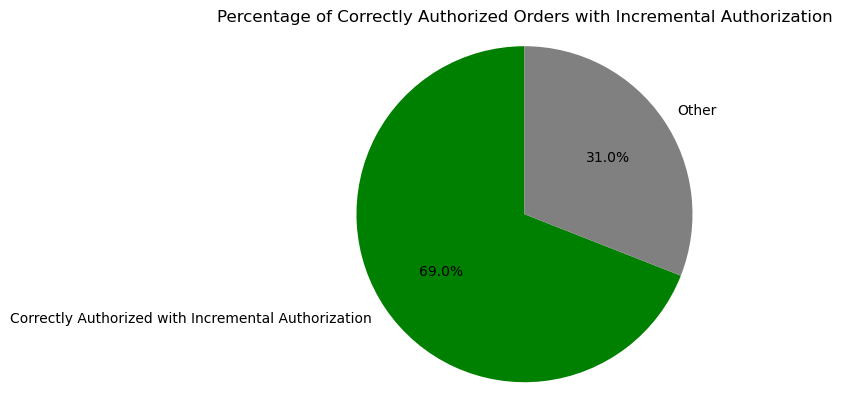

In [124]:
df_correctly_authorized_checkout = df[df['products_total_checkout'] >= df['purchase_total_price']]

percentage_good_with_checkout = df_correctly_authorized_checkout.shape[0] / df.shape[0]

labels = ['Correctly Authorized with Incremental Authorization', 'Other']
sizes = [percentage_good_with_checkout, 1 - percentage_good_with_checkout]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'grey'])
ax.axis('equal')

plt.title('Percentage of Correctly Authorized Orders with Incremental Authorization')
plt.show()


## 3. Are there differences when split by country? 

Firstly, we will extract an authorized Dataframe. Then, we extract authorized, under-authorized and total value counts. Finally, we will do a grpah to analyze the data.

In [107]:
df_authorized = []

for index, row in df.iterrows():
    if row['products_total'] >= row['purchase_total_price']:
        df_authorized.append(row)
        
df_authorized = pd.DataFrame(df_authorized)


#### Total orders (Value Counts) per Country

In [108]:

df["country_code"].value_counts()

country_code
AR    13191
ES    12806
TR     6348
PE     4785
UA     4119
IT     2808
EC     2508
RO     2167
FR     2136
EG     1828
MA     1632
CR     1107
CL     1104
PA     1013
PT      909
GT      567
GE      546
DO      500
UY      190
KE       94
PR       33
CI        6
BR        2
Name: count, dtype: int64

#### Authorized Orders (Value Counts) per Country

In [109]:
df_authorized["country_code"].value_counts()

country_code
AR    5198
ES    4841
TR    3132
UA    2116
PE    2110
IT    1255
RO    1161
MA     968
EC     897
FR     734
EG     678
CR     610
PA     397
PT     381
GT     379
GE     263
DO     182
CL     143
UY     109
KE      41
PR      19
CI       4
BR       1
Name: count, dtype: int64

#### Under-authorized orders (Value Counts) per Country

In [111]:
df_under_authorized["country_code"].value_counts()

country_code
AR    7993
ES    7965
TR    3216
PE    2675
UA    2003
EC    1611
IT    1553
FR    1402
EG    1150
RO    1006
CL     961
MA     664
PA     616
PT     528
CR     497
DO     318
GE     283
GT     188
UY      81
KE      53
PR      14
CI       2
BR       1
Name: count, dtype: int64

#### Graph

We finally decide that the best way to analyze is to graph the unauthorized orders by country:

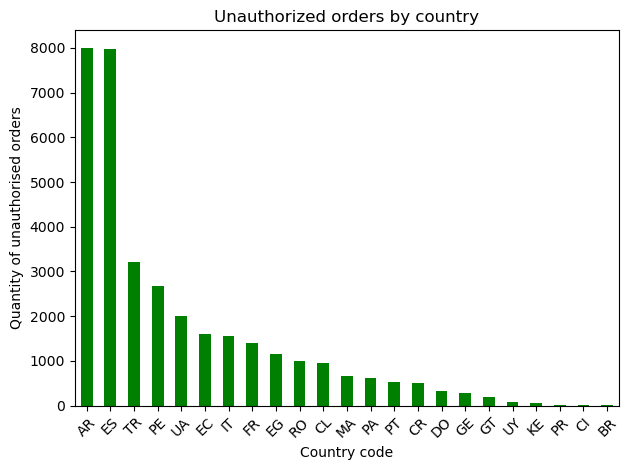

In [129]:
count = df_under_authorized["country_code"].value_counts()
count.plot(kind='bar', color='green')  
plt.title('Unauthorized orders by country')
plt.xlabel('Country code')  
plt.ylabel('Quantity of unauthorised orders')  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show() 

## 4. For the remainder of orders that would be outside of incremental auth what values would be necessary to capture the remaining amount?

We create a new column so we can have this information:

In [87]:
df_under_authorized["remaining_amount"] = df_under_authorized["purchase_total_price"] - df_under_authorized["products_total"]
df_under_authorized

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,remaining_amount
3,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48,3.62
4,33512273,2019-03-10 23:57:13.000000,TR,63536,DeliveredStatus,PAID,4,1.88,1.96,0.08
6,33511759,2019-03-10 23:55:21.000000,TR,47493,DeliveredStatus,PAID,2,2.37,2.45,0.08
9,33523444,2019-03-10 23:53:38.000000,RO,72549,DeliveredStatus,PAID,2,2.05,10.17,8.12
11,33530379,2019-03-10 23:52:20.000000,FR,4444,DeliveredStatus,PAID,1,8.10,10.20,2.10
...,...,...,...,...,...,...,...,...,...,...
60379,31965637,2019-03-01 00:30:50.000000,TR,44528,DeliveredStatus,PAID,1,3.44,6.89,3.45
60388,32002620,2019-03-01 00:14:57.000000,AR,62623,DeliveredStatus,PAID,2,1.79,5.36,3.57
60394,31960607,2019-03-01 00:04:31.000000,TR,68820,DeliveredStatus,PAID,2,10.17,10.33,0.16
60396,32002046,2019-03-01 00:03:06.000000,AR,55159,DeliveredStatus,PAID,1,4.24,4.91,0.67


## 5. Which stores are the most problematic in terms of orders and monetary value? 

We think the best way to analyze this is to create a new column in the first Dataframe. This will be a Boolean that analyze wheather the order is authorized or not.

Secondly, we separately analyze how problematic they are in monetary terms, as well as in orders terms.

In [114]:
def under_authorized(row):
    return True if row['products_total'] < row['purchase_total_price'] else False

df['under_authorized'] = df.apply(under_authorized, axis=1)

In [115]:
monetary_value = df.groupby('store_address')['purchase_total_price'].sum().sort_values(ascending=False)
monetary_value

store_address
28669    6376.07
12513    5307.10
28671    4714.97
28712    3781.39
14455    3514.33
          ...   
65158       0.00
65175       0.00
65286       0.00
71756       0.00
53591       0.00
Name: purchase_total_price, Length: 5755, dtype: float64

In [116]:
orders_value = df.groupby('store_address')['under_authorized'].sum().sort_values(ascending = False)
orders_value

store_address
28671    448
28712    217
28286    204
14455    179
11694    160
        ... 
67405      0
67399      0
67375      0
67350      0
75236      0
Name: under_authorized, Length: 5755, dtype: int64

#### Graphic Representation

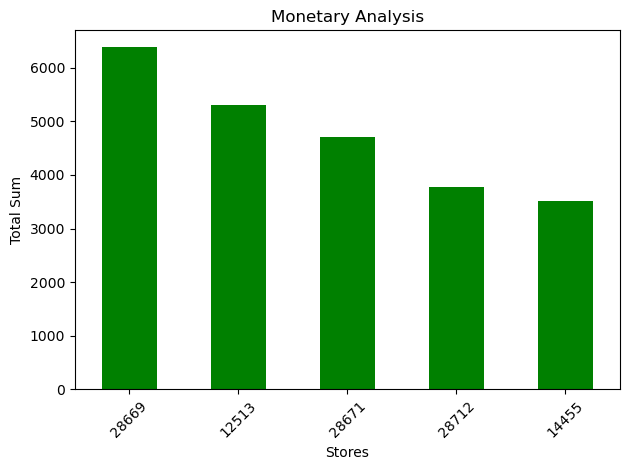

In [134]:
count = monetary_value.head(5)
count.plot(kind='bar', color='green')  
plt.title('Monetary Analysis')
plt.xlabel('Stores')  
plt.ylabel('Total Sum')  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show() 

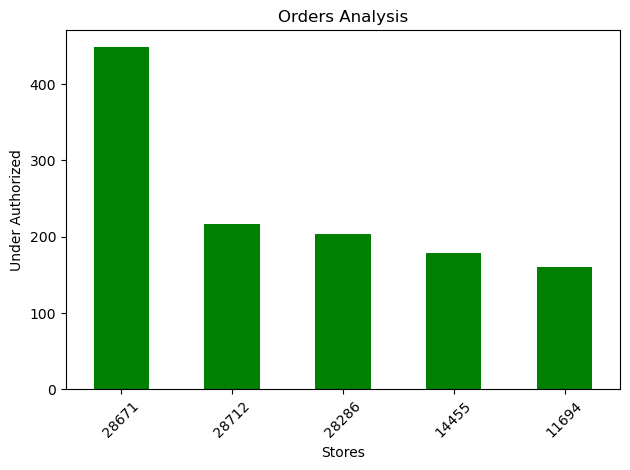

In [135]:
count = orders_value.head(5)
count.plot(kind='bar', color='green')  
plt.title('Orders Analysis')
plt.xlabel('Stores')  
plt.ylabel('Under Authorized')  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show() 

## 6. For under-auth orders is there a correlation between the difference in the prices and the cancellation of the order? In other words: Is an order more likely to be cancelled as the price difference increases? 

We created a column to know the price difference and then we provide a graphic representation to understand the correlation.


In [117]:
df["remaining_amount"] = df["purchase_total_price"] - df["products_total"]
df

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,products_total_checkout,under_authorized,remaining_amount
0,33512615,2019-03-10 23:58:32.000000,TR,28725,DeliveredStatus,PAID,1,3.76,3.76,4.512,False,0.00
1,33512451,2019-03-10 23:57:56.000000,TR,28725,DeliveredStatus,PAID,1,2.86,2.86,3.432,False,0.00
2,33530892,2019-03-10 23:57:33.000000,ES,19777,CanceledStatus,PAID,1,12.95,0.00,15.540,False,-12.95
3,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48,3.432,True,3.62
4,33512273,2019-03-10 23:57:13.000000,TR,63536,DeliveredStatus,PAID,4,1.88,1.96,2.256,True,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...
60394,31960607,2019-03-01 00:04:31.000000,TR,68820,DeliveredStatus,PAID,2,10.17,10.33,12.204,True,0.16
60395,32002079,2019-03-01 00:03:53.000000,AR,50175,CanceledStatus,PAID,1,3.80,0.00,4.560,False,-3.80
60396,32002046,2019-03-01 00:03:06.000000,AR,55159,DeliveredStatus,PAID,1,4.24,4.91,5.088,True,0.67
60397,32001950,2019-03-01 00:01:01.000000,AR,62504,CanceledStatus,PAID,1,4.91,0.00,5.892,False,-4.91


#### Scatter plot

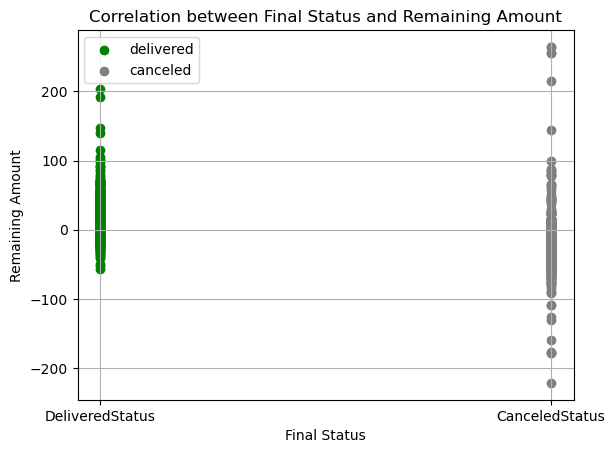

In [125]:
df_delivered = df[df['final_status'] == 'DeliveredStatus']
df_canceled = df[df['final_status'] == 'CanceledStatus']
plt.scatter(df_delivered['final_status'], df_delivered['remaining_amount'], color='green', label='delivered')
plt.scatter(df_canceled['final_status'], df_canceled['remaining_amount'], color='grey', label='canceled')
plt.title('Correlation between Final Status and Remaining Amount')
plt.xlabel('Final Status')
plt.ylabel('Remaining Amount')
plt.legend()  
plt.grid(True)  
plt.show()

The plot does not show a clear pattern or trend between the price paid by the courier and the total product price.

There are both delivered and canceled orders spread across various price ranges, suggesting that the price difference alone may not be a strong predictor of the order's final status.

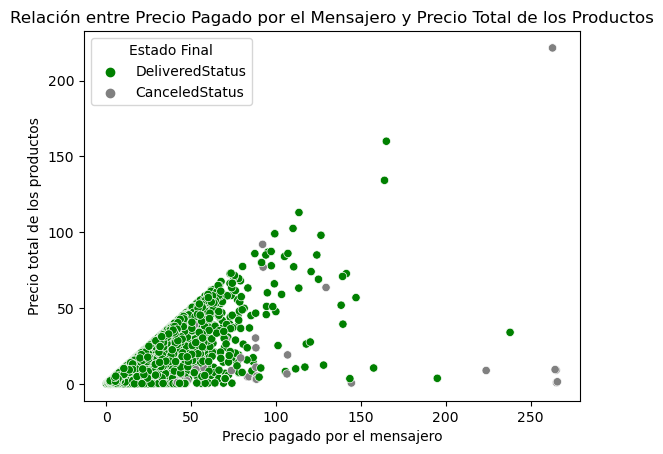

In [128]:
custom_colors = {'DeliveredStatus': 'green', 'CanceledStatus': 'grey'}


under_auth_orders = df[df['products_total'] < df['purchase_total_price']]
sns.scatterplot(x='purchase_total_price', y='products_total', hue='final_status', data=under_auth_orders, alpha=1, palette=custom_colors)
plt.xlabel('Precio pagado por el mensajero')
plt.ylabel('Precio total de los productos')
plt.title('Relación entre Precio Pagado por el Mensajero y Precio Total de los Productos')
plt.legend(title='Estado Final')
plt.show()

Delivered orders (blue points) tend to have lower remaining amounts compared to canceled orders (red points).

There is a visible pattern where higher remaining amounts are associated with canceled orders, while lower remaining amounts are associated with delivered orders.

This suggests a potential correlation between the final status and the remaining amount, with higher remaining amounts being more likely for canceled orders.

### Conclusions

The first scatter plot does not reveal a strong correlation between the price paid by the courier and the total product price for under-authorized orders.
The second plot suggests a correlation between the final status and the remaining amount, indicating that higher remaining amounts are associated with a higher likelihood of order cancellation.